In [1]:
#importar librerias
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
#Leer dataframe
#Nota: Como el dataframe que el cliente pretende que utilizamos está en datos abiertos
#utilizamos la versión del 06072021
#https://www.datos.gov.co/Transporte/Operaci-n-de-pasajeros-y-despacho-de-veh-culos-en-/eh75-8ah6
df1 = pd.read_csv("data/Operacion_Pasajeros_despacho_vehiculos_carretera_Dataframe_06072021.csv")

In [7]:
#Revisar si hay datos faltantes NaN en el dataframe
df1.isnull().any()

TERMINAL                  False
CLASE_VEHICULO            False
NIVEL_SERVICIO            False
MUNICIPIO_ORIGEN_RUTA     False
MUNICIPIO_DESTINO_RUTA    False
FECHA_DESPACHO            False
HORA_DESPACHO             False
TIPO_DESPACHO             False
DESPACHOS                 False
PASAJEROS                 False
dtype: bool

In [8]:
#Explorar el contenido del dataframe
df1.head(5)

,TERMINAL,CLASE_VEHICULO,NIVEL_SERVICIO,MUNICIPIO_ORIGEN_RUTA,MUNICIPIO_DESTINO_RUTA,FECHA_DESPACHO,HORA_DESPACHO,TIPO_DESPACHO,DESPACHOS,PASAJEROS
0,T.T. DE BOGOTÁ NORTE,MICROBUS,LUJO,11001,15759,03/01/2021 12:00:00 AM,8,TRANSITO,2,0
1,T.T. DE BOGOTÁ SALITRE,BUS,LUJO,11001,76001,03/12/2021 12:00:00 AM,11,ORIGEN,4,45
2,T.T. DE CALI,BUSETA,BASICO,76001,52378,01/09/2021 12:00:00 AM,6,ORIGEN,1,3
3,T.T. DE MELGAR,MICROBUS,BASICO,73449,25488,02/28/2021 12:00:00 AM,12,ORIGEN,1,1
4,T.T. DE MANIZALES,MICROBUS,LUJO,17001,17174,01/28/2021 12:00:00 AM,20,ORIGEN,1,13


In [9]:
#Conocer los descriptores del dataframe
df1.describe(include=['object'])

,TERMINAL,CLASE_VEHICULO,NIVEL_SERVICIO,FECHA_DESPACHO,TIPO_DESPACHO
count,9014601,9014601,9014601,9014601,9014601
unique,49,6,3,707,2
top,T.T. DE BOGOTÁ SALITRE,BUS,LUJO,12/30/2019 12:00:00 AM,ORIGEN
freq,822165,3487341,6346499,22435,6774036


In [10]:
#Revisar tipos de datos
df1.dtypes

TERMINAL                  object
CLASE_VEHICULO            object
NIVEL_SERVICIO            object
MUNICIPIO_ORIGEN_RUTA      int64
MUNICIPIO_DESTINO_RUTA     int64
FECHA_DESPACHO            object
HORA_DESPACHO              int64
TIPO_DESPACHO             object
DESPACHOS                  int64
PASAJEROS                  int64
dtype: object

In [11]:
#Como la columna fecha de despacho tiene una hora que siempre esta en 12:00:00AM se elimina
df1["FECHA_DESPACHO"]=df1["FECHA_DESPACHO"].apply(lambda x:x[:10])

In [12]:
#Colocar fecha en formato mes y año 
df1["FECHA_DESPACHO"]=pd.to_datetime(df1["FECHA_DESPACHO"])

In [13]:
#Revisar si hay datos erroneos en la fecha
df1["FECHA_DESPACHO"].min()

Timestamp('2019-08-01 00:00:00')

In [14]:
#Revisar si hay datos erroneos en la fecha
df1["FECHA_DESPACHO"].max()

Timestamp('2052-12-28 00:00:00')

In [16]:
#Se observa que existen datos erroneos que están en el futuro y no corresponden a datos históricos que son los que tenemos
#Colocamos una marca de tiempo para conocer que datos están en el futuro
date=pd.Timestamp('2021-07-06 00:00:00')
df1[df1["FECHA_DESPACHO"]>date]

,TERMINAL,CLASE_VEHICULO,NIVEL_SERVICIO,MUNICIPIO_ORIGEN_RUTA,MUNICIPIO_DESTINO_RUTA,FECHA_DESPACHO,HORA_DESPACHO,TIPO_DESPACHO,DESPACHOS,PASAJEROS
377120,T.T. DE BUENAVENTURA,MICROBUS,LUJO,76109,76001,2052-12-28,19,ORIGEN,1,5


In [17]:
#Se observa que es solo un dato el que está erróneo. Como no es posible conocer con certeza cual es el error,
#Además se cuenta con una base de datos de aproximadamente 8 millones de datos, procedemos a eliminarlo
#Sin que esto impacte en el resultado final
indexborrar=df1[df1["FECHA_DESPACHO"]>date].index
df1.drop(index=indexborrar,inplace=True)

In [21]:
#Revisar si hay datos erroneos en número de despacho
(df1["DESPACHOS"].min(),df1["DESPACHOS"].max())

(1, 140)

In [22]:
#Revisar si hay datos erroneos en número de despacho
(df1["PASAJEROS"].min(),df1["PASAJEROS"].max())


(0, 2200)

<AxesSubplot:title={'center':'Pasajeros'}, ylabel='Frequency'>

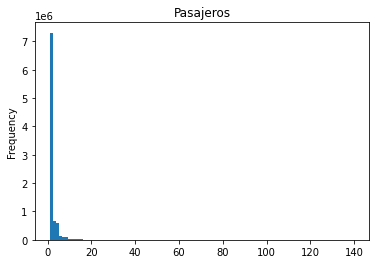

In [27]:
df1["DESPACHOS"].plot.hist(title="Despachos", bins=100)

<AxesSubplot:title={'center':'Pasajeros'}, ylabel='Frequency'>

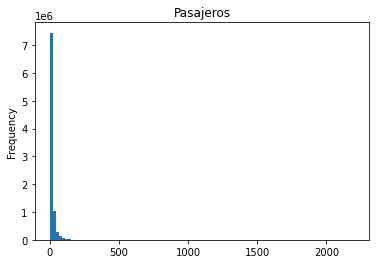

In [28]:
df1["PASAJEROS"].plot.hist(title="Pasajeros", bins=100)

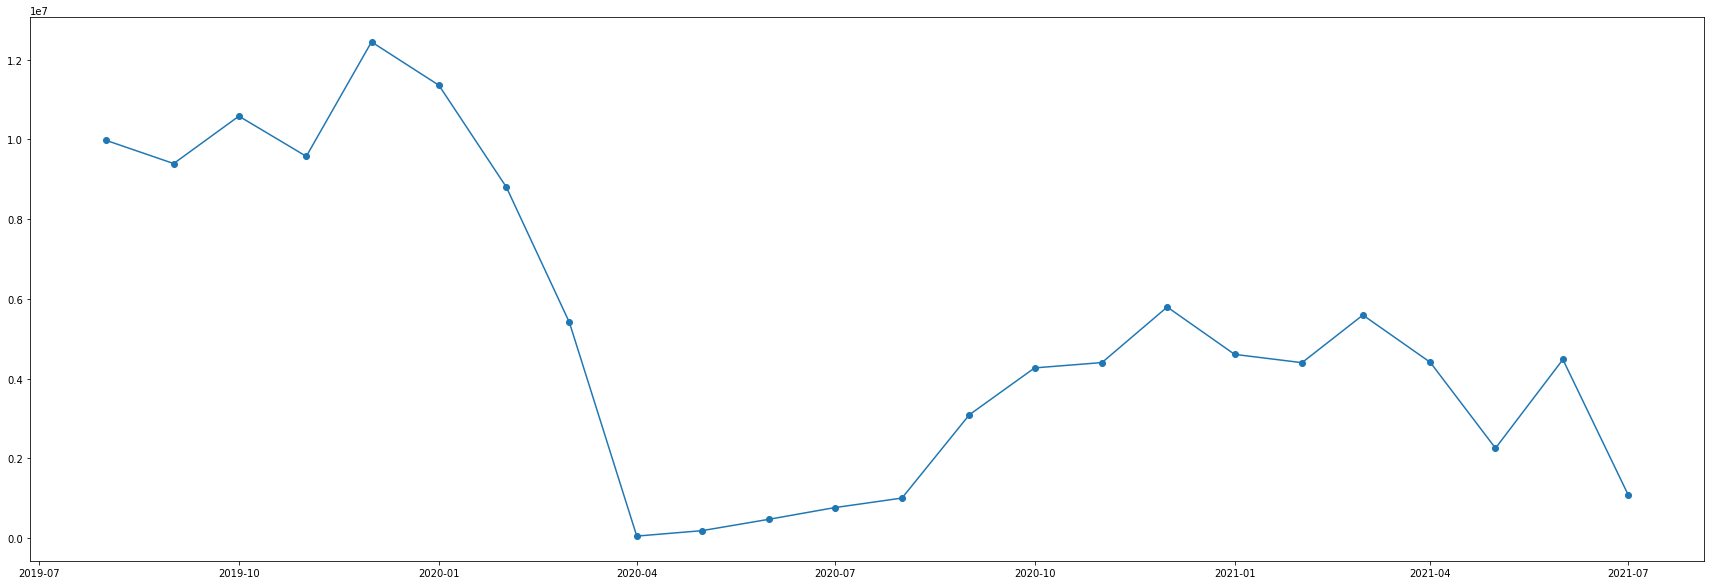

In [30]:
#EXPLORACIÓN DE NÚMERO DE PASAJEROS DURANTE LOS MESES ESTUDIADOS
df1['MES_DESPACHO'] = df1['FECHA_DESPACHO'].apply(lambda x: x.strftime('%m/%Y'))
df1_mes = df1.groupby('MES_DESPACHO')['PASAJEROS'].sum().reset_index()
df1_mes['MES_DESPACHO'] = pd.to_datetime(df1_mes['MES_DESPACHO'],format = '%m/%Y')
df1_mes.sort_values(by= 'MES_DESPACHO',inplace=True)

plt.figure(figsize=(30,10))
plt.plot('MES_DESPACHO','PASAJEROS',data = df1_mes,linestyle='-', marker='o')

In [31]:
#INITIAL EXPLORATION OF CORRELATION BETWEWN PASSENGERS AND TRIPS
df1[["DESPACHOS", "PASAJEROS"]].corr()

,DESPACHOS,PASAJEROS
DESPACHOS,1.000000,0.587729
PASAJEROS,0.587729,1.000000
